# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pwd
!ls -ltr

/content
total 55300
drwxr-xr-x 1 root root     4096 Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 28311552 Nov 23 02:22 True.csv
-rw-r--r-- 1 root root 28311552 Nov 23 02:22 Fake.csv


In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv

true_df = pd.read_csv("/content/True.csv")

# Import the second file - Fake.csv

fake_df = pd.read_csv("/content/Fake.csv")


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data

# Inspect the True News DataFrame
true_df.info()

# Display first few rows
true_df.head()

# Check for missing values
true_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


,0
title,0
text,0
date,0


In [6]:
# Inspect the DataFrame with Fake News to understand the given data
# Inspect the Fake News DataFrame
fake_df.info()

# Display first few rows
fake_df.head()

# Check for missing values
fake_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


,0
title,21
text,21
date,42


In [7]:
# Print the column details for True News DataFrame
# Print column details for True News DataFrame
print("Columns in True News DataFrame:")
print(true_df.columns)

# Display basic statistical info (optional)
true_df.describe(include='all')


Columns in True News DataFrame:
Index(['title', 'text', 'date'], dtype='object')


,title,text,date
count,21417,21417,21417
unique,20826,21192,716
top,Factbox: Trump fills top jobs for his administration,"(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afgh...","December 20, 2017"
freq,14,8,182


In [8]:
# Print the column details for Fake News Dataframe
# Print column details for Fake News DataFrame
print("Columns in Fake News DataFrame:")
print(fake_df.columns)

# Optional: Display summary information
fake_df.describe(include='all')


Columns in Fake News DataFrame:
Index(['title', 'text', 'date'], dtype='object')


,title,text,date
count,23502,23502,23481
unique,17914,17466,1692
top,MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead,,"May 10, 2017"
freq,6,626,46


In [9]:
# Print the column names of both DataFrames


print("Columns in True News DataFrame:")
print(true_df.columns.tolist())

print("\nColumns in Fake News DataFrame:")
print(fake_df.columns.tolist())


Columns in True News DataFrame:
['title', 'text', 'date']

Columns in Fake News DataFrame:
['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true

true_df['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake

fake_df['news_label'] = 0

# Verify the changes
true_df.head(), fake_df.head()


(                                                                   title  \
 0       As U.S. budget fight looms, Republicans flip their fiscal script   
 1       U.S. military to accept transgender recruits on Monday: Pentagon   
 2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
 3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
 4  Trump wants Postal Service to charge 'much more' for Amazon shipments   
 
                                                                                                                                                                                                       text  \
 0  WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fis...   
 1  WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting o

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true_df, fake_df], axis=0, ignore_index=True)

In [12]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fis...","December 31, 2017",1
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after Pres...","December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some ...","December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the N...","December 30, 2017",1
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,"SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online r...","December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check Presence of Null Values
news_df.isnull().sum()

,0
title,21
text,21
date,42
news_label,0


In [14]:
# Handle Rows with Null Values

news_df = news_df.dropna()

# Verify again
news_df.isnull().sum()

,0
title,0
text,0
date,0
news_label,0


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [15]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

news_df['news_text'] = news_df['title'].astype(str) + " " + news_df['text'].astype(str) + " " + news_df['date'].astype(str)

# Drop the irrelevant columns from the DataFrame as they are no longer needed

news_df = news_df.drop(columns=['title', 'text', 'date'])

# Display the first 5 rows of the updated DataFrame to check the result

news_df.head()


,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansio..."
1,1,U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as o...
2,1,Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should co...
3,1,FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt...
4,1,Trump wants Postal Service to charge 'much more' for Amazon shipments SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to shi...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [16]:
# Create a new DataFrame df_clean to store processed text
df_clean = pd.DataFrame()

# Copy raw text
df_clean['raw_text'] = news_df['news_text']

# Add the news_label column explicitly (as required in the instruction)
df_clean['news_label'] = news_df['news_label']

# Prepare empty columns for further processing
df_clean['clean_text'] = ""        # after lowercase, punctuation remove, etc.
df_clean['lemmatized_text'] = ""   # after lemmatization + POS filtering

# Check
print("df_clean shape:", df_clean.shape)
df_clean.head()



df_clean shape: (44898, 4)


,raw_text,news_label,clean_text,lemmatized_text
0,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansio...",1,,
1,U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as o...,1,,
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should co...,1,,
3,FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt...,1,,
4,Trump wants Postal Service to charge 'much more' for Amazon shipments SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to shi...,1,,


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [17]:
# Write the function here to clean the text and remove all the unnecessary elements

# Function to clean news text
def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove text inside square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [18]:
# Apply the cleaning function to raw_text and store the cleaned text
df_clean['clean_text'] = df_clean['raw_text'].apply(clean_text)

# Preview the updated DataFrame
df_clean[['raw_text', 'clean_text']].head()

,raw_text,clean_text
0,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansio...",as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the ...
1,U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as o...,us military to accept transgender recruits on monday pentagon washington reuters transgender people will be allowed for the first time to enlist in the us military starting on monday as ordered b...
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should co...,senior us republican senator let mr mueller do his job washington reuters the special counsel investigation of links between russia and president trump’s election campaign should continue withou...
3,FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt...,fbi russia probe helped by australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos told an australian diplomat in may that russia had political dirt on democ...
4,Trump wants Postal Service to charge 'much more' for Amazon shipments SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to shi...,trump wants postal service to charge much more for amazon shipments seattlewashington reuters president donald trump called on the us postal service on friday to charge “much more” to ship packag...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [19]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
# Function to POS tag and lemmatize, keeping only NN and NNS (nouns)
def pos_lemmatize_keep_nouns(text):
    """
    Input: raw cleaned text (string)
    Process:
      - run spaCy NLP
      - keep tokens whose token.tag_ is 'NN' or 'NNS'
      - filter out stopwords, punctuation, non-alpha tokens
      - lemmatize tokens and return a space-joined string of lemmas
    Output: string with lemmatized nouns only
    """
    if not isinstance(text, str) or text.strip() == "":
        return ""

    doc = nlp(text)
    lemmas = []
    for token in doc:
        # keep only alphabetic tokens, not stopwords, and with detailed tag NN or NNS
        if token.is_alpha and not token.is_stop and token.tag_ in ("NN", "NNS"):
            lemma = token.lemma_.lower().strip()
            if lemma:
                lemmas.append(lemma)
    return " ".join(lemmas)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [20]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean['lemmatized_text'] = df_clean['clean_text'].progress_apply(pos_lemmatize_keep_nouns)

# Display first few rows to verify
df_clean[['clean_text', 'lemmatized_text']].head()


100%|██████████| 44898/44898 [55:57<00:00, 13.37it/s]


,clean_text,lemmatized_text
0,as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the ...,budget fight script head faction month expansion debt tax cut conservative budget restraint pivot way mark meadow nation line spending lawmaker battle holiday lawmaker budget fight issue immigrati...
1,us military to accept transgender recruits on monday pentagon washington reuters transgender people will be allowed for the first time to enlist in the us military starting on monday as ordered b...,military transgender recruit people time military court administration ruling transgender ban appeal court week administration request hold order court judge military transgender recruit official ...
2,senior us republican senator let mr mueller do his job washington reuters the special counsel investigation of links between russia and president trump’s election campaign should continue withou...,job counsel investigation link trump election campaign interference call trump administration ally lawmaker senator force judiciary committee counsel investigation interference investigation inves...
3,fbi russia probe helped by australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos told an australian diplomat in may that russia had political dirt on democ...,probe diplomat trump campaign adviser diplomat dirt candidate conversation papadopoulo diplomat alexander downer factor decision counterintelligence investigation contact trump campaign time month...
4,trump wants postal service to charge much more for amazon shipments seattlewashington reuters president donald trump called on the us postal service on friday to charge “much more” to ship packag...,trump service amazon shipment service ship package amazon amzno fight giant past office billion dollar year amazon package amazon post office trump twitter president tweet attention finance servic...


### Save the Cleaned data as a csv file (Recommended)

In [24]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")

df_clean.to_csv("clean_df.csv", index=False)


df_clean = pd.read_csv("clean_df.csv")

In [23]:
!pwd
!ls -ltr

/content
total 113044
drwxr-xr-x 1 root root     4096 Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 53334946 Nov 23 02:22 True.csv
-rw-r--r-- 1 root root 62413269 Nov 23 02:22 Fake.csv


In [25]:
# Check the first few rows of the DataFrame
df_clean.head()



,raw_text,news_label,clean_text,lemmatized_text
0,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansio...",1,as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the ...,budget fight script head faction month expansion debt tax cut conservative budget restraint pivot way mark meadow nation line spending lawmaker battle holiday lawmaker budget fight issue immigrati...
1,U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as o...,1,us military to accept transgender recruits on monday pentagon washington reuters transgender people will be allowed for the first time to enlist in the us military starting on monday as ordered b...,military transgender recruit people time military court administration ruling transgender ban appeal court week administration request hold order court judge military transgender recruit official ...
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should co...,1,senior us republican senator let mr mueller do his job washington reuters the special counsel investigation of links between russia and president trump’s election campaign should continue withou...,job counsel investigation link trump election campaign interference call trump administration ally lawmaker senator force judiciary committee counsel investigation interference investigation inves...
3,FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt...,1,fbi russia probe helped by australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos told an australian diplomat in may that russia had political dirt on democ...,probe diplomat trump campaign adviser diplomat dirt candidate conversation papadopoulo diplomat alexander downer factor decision counterintelligence investigation contact trump campaign time month...
4,Trump wants Postal Service to charge 'much more' for Amazon shipments SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to shi...,1,trump wants postal service to charge much more for amazon shipments seattlewashington reuters president donald trump called on the us postal service on friday to charge “much more” to ship packag...,trump service amazon shipment service ship package amazon amzno fight giant past office billion dollar year amazon package amazon post office trump twitter president tweet attention finance servic...


In [26]:
# Check the dimensions of the DataFrame
df_clean.shape



(44898, 4)

In [27]:
# Check the dimensions of the DataFrame
df_clean.shape



(44898, 4)

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [28]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

# Features and labels
X = df_clean['lemmatized_text']
y = df_clean['news_label']

# Train–validation split: 70% train, 30% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=True
)

# Check the shapes
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])


Training set size: 31428
Validation set size: 13470


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [29]:
# Character length of cleaned news text
df_clean['clean_text_len'] = df_clean['clean_text'].astype(str).apply(len)

# Character length of lemmatized news text with POS tags removed
df_clean['lemmatized_text_len'] = df_clean['lemmatized_text'].astype(str).apply(len)

# Preview the updated DataFrame
df_clean[['clean_text', 'clean_text_len', 'lemmatized_text', 'lemmatized_text_len']].head()



,clean_text,clean_text_len,lemmatized_text,lemmatized_text_len
0,as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the ...,4582,budget fight script head faction month expansion debt tax cut conservative budget restraint pivot way mark meadow nation line spending lawmaker battle holiday lawmaker budget fight issue immigrati...,1393
1,us military to accept transgender recruits on monday pentagon washington reuters transgender people will be allowed for the first time to enlist in the us military starting on monday as ordered b...,4058,military transgender recruit people time military court administration ruling transgender ban appeal court week administration request hold order court judge military transgender recruit official ...,1342
2,senior us republican senator let mr mueller do his job washington reuters the special counsel investigation of links between russia and president trump’s election campaign should continue withou...,2801,job counsel investigation link trump election campaign interference call trump administration ally lawmaker senator force judiciary committee counsel investigation interference investigation inves...,840
3,fbi russia probe helped by australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos told an australian diplomat in may that russia had political dirt on democ...,2470,probe diplomat trump campaign adviser diplomat dirt candidate conversation papadopoulo diplomat alexander downer factor decision counterintelligence investigation contact trump campaign time month...,769
4,trump wants postal service to charge much more for amazon shipments seattlewashington reuters president donald trump called on the us postal service on friday to charge “much more” to ship packag...,5086,trump service amazon shipment service ship package amazon amzno fight giant past office billion dollar year amazon package amazon post office trump twitter president tweet attention finance servic...,1821


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

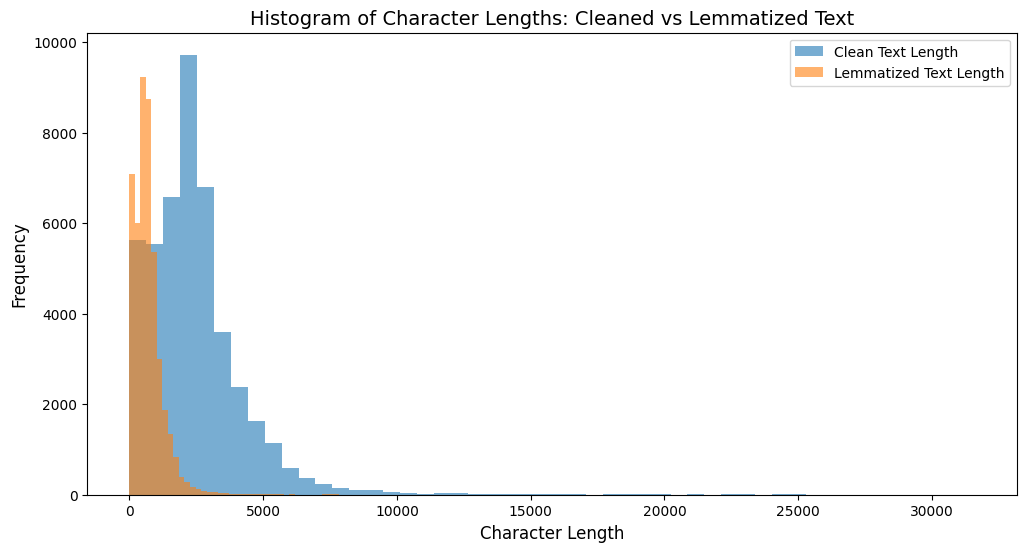

In [30]:
# Create a histogram plot to visualise character lengths

plt.figure(figsize=(12,6))

# Histogram for cleaned news text
plt.hist(df_clean['clean_text_len'], bins=50, alpha=0.6, label='Clean Text Length')

# Histogram for lemmatized news text
plt.hist(df_clean['lemmatized_text_len'], bins=50, alpha=0.6, label='Lemmatized Text Length')

# Titles and labels
plt.title("Histogram of Character Lengths: Cleaned vs Lemmatized Text", fontsize=14)
plt.xlabel("Character Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

plt.show()



### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

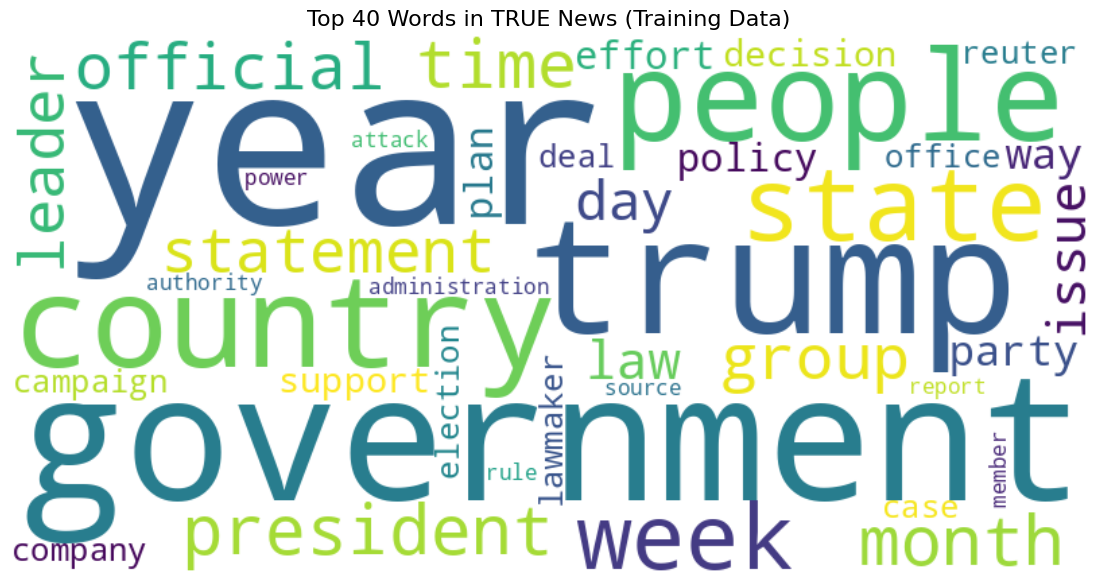

In [31]:
from wordcloud import WordCloud

# Filter TRUE news from training data
true_train_text = X_train[y_train == 1]  # Only rows with label = 1

# Combine all text into one string
true_text_combined = " ".join(true_train_text.astype(str).tolist())

# Generate the WordCloud
wordcloud_true = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=40  # Limit to top 40 words
).generate(true_text_combined)

# Plot the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in TRUE News (Training Data)", fontsize=16)
plt.show()



##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

Top 40 words in FAKE news (training set):


,word,frequency
0,trump,41801
1,people,18485
2,president,11515
3,time,11204
4,t,10637
5,year,10529
6,image,9738
7,state,8653
8,woman,8070
9,video,8042


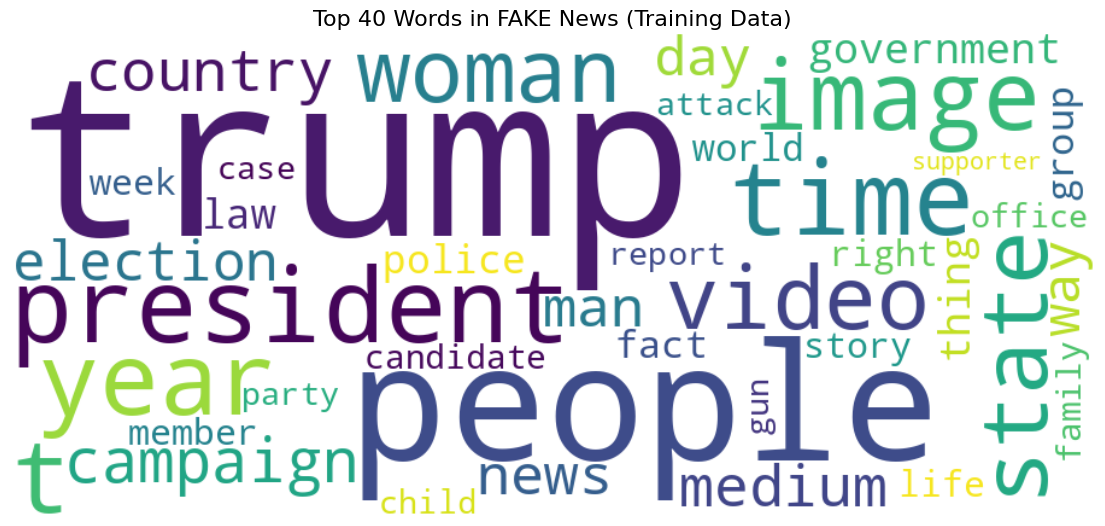

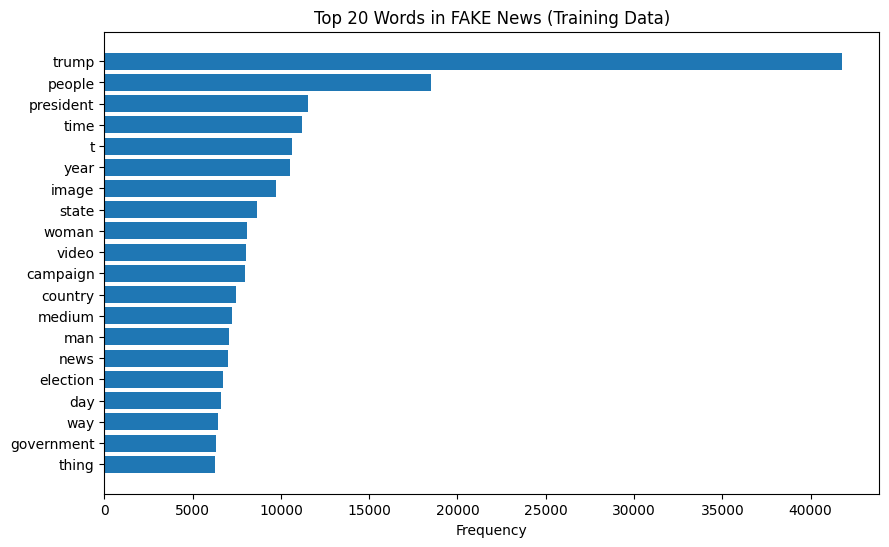

In [32]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# 1) Filter FAKE news from training data (label = 0)
fake_train_text = X_train[y_train == 0]

# 2) Combine into one string, ensuring non-string safety
fake_text_combined = " ".join(fake_train_text.astype(str).tolist())

# 3) Compute token frequencies (tokens are whitespace-split because lemmatized_text is space-joined tokens)
tokens = fake_text_combined.split()
freq_counter = Counter(tokens)
top40 = freq_counter.most_common(40)

# Print top 40 as a DataFrame for clarity
top40_df = pd.DataFrame(top40, columns=['word', 'frequency'])
print("Top 40 words in FAKE news (training set):")
display(top40_df)

# 4) Generate WordCloud limited to top 40 words
wordcloud_fake = WordCloud(
    width=900,
    height=400,
    background_color='white',
    max_words=40
).generate_from_frequencies(dict(top40))

# 5) Plot the word cloud
plt.figure(figsize=(14,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in FAKE News (Training Data)", fontsize=16)
plt.show()

# 6) Optional: bar plot for top 20 frequencies
plt.figure(figsize=(10,6))
top20 = top40_df.head(20).sort_values('frequency')  # sort for horizontal bar chart
plt.barh(top20['word'], top20['frequency'])
plt.xlabel("Frequency")
plt.title("Top 20 Words in FAKE News (Training Data)")
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [33]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(text_series, n=1, top_k=20):
    """
    Returns a DataFrame containing the top 'top_k' n-grams
    of size 'n' from the given Pandas Series (processed text).

    Parameters:
        text_series: Pandas Series containing text data
        n: n-gram size (1 = unigrams, 2 = bigrams, 3 = trigrams)
        top_k: number of top n-grams to return

    Returns:
        DataFrame with columns ['ngram', 'frequency']
    """

    # Convert all text to string (safety)
    text_data = text_series.astype(str)

    # Create CountVectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(text_data)

    # Sum all token counts
    counts = X.sum(axis=0).A1

    # Map n-gram to count
    freq = list(zip(vectorizer.get_feature_names_out(), counts))

    # Sort by frequency
    freq_sorted = sorted(freq, key=lambda x: x[1], reverse=True)[:top_k]

    # Return as DataFrame
    return pd.DataFrame(freq_sorted, columns=['ngram', 'frequency'])


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [34]:
# Handle NaN values in the text data
# Handle NaN values by replacing them with empty strings
X_train = X_train.fillna("")
X_val = X_val.fillna("")


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in TRUE News:


,ngram,frequency
0,trump,30893
1,state,14058
2,government,13846
3,year,13187
4,people,10761
5,election,9967
6,country,9902
7,official,9148
8,party,9016
9,president,8054


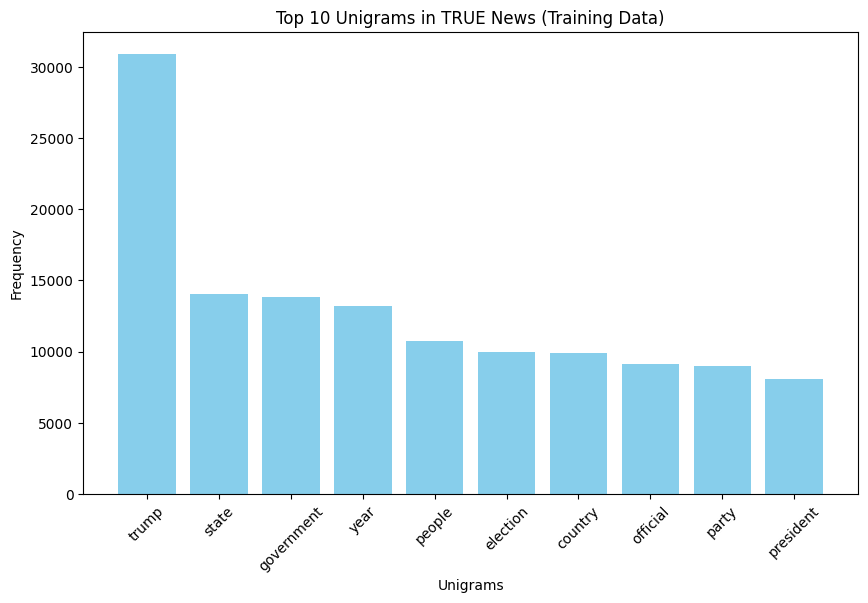

In [35]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
# Get top 10 unigrams for TRUE news (label = 1)
true_unigrams = get_top_ngrams(X_train[y_train == 1], n=1, top_k=10)

# Display the top 10 unigrams
print("Top 10 Unigrams in TRUE News:")
display(true_unigrams)

# Plot the top 10 unigrams
plt.figure(figsize=(10,6))
plt.bar(true_unigrams['ngram'], true_unigrams['frequency'], color='skyblue')
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Unigrams in TRUE News (Training Data)")
plt.xticks(rotation=45)
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in TRUE News:


,ngram,frequency
0,trump campaign,1373
1,trump administration,1265
2,news conference,953
3,tax reform,740
4,climate change,722
5,percent percent,720
6,request comment,696
7,house representative,686
8,security force,683
9,attorney general,625


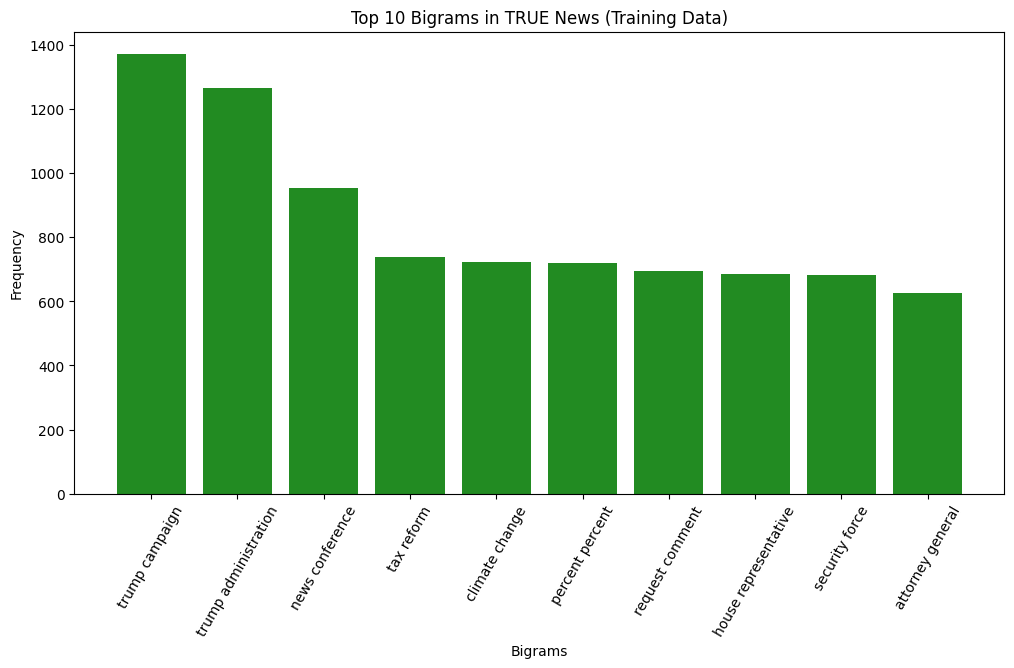

In [36]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
# Get top 10 bigrams for TRUE news (label = 1)
true_bigrams = get_top_ngrams(X_train[y_train == 1], n=2, top_k=10)

# Display the top 10 bigrams
print("Top 10 Bigrams in TRUE News:")
display(true_bigrams)

# Plot the top 10 bigrams
plt.figure(figsize=(12,6))
plt.bar(true_bigrams['ngram'], true_bigrams['frequency'], color='forestgreen')
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Bigrams in TRUE News (Training Data)")
plt.xticks(rotation=60)
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in TRUE News:


,ngram,frequency
0,official condition anonymity,215
1,trump transition team,213
2,candidate donald trump,202
3,tax rate percent,161
4,article sap editorial,131
5,editorial staff sap,131
6,involvement creation production,131
7,sap editorial staff,131
8,sap involvement creation,131
9,staff sap involvement,131


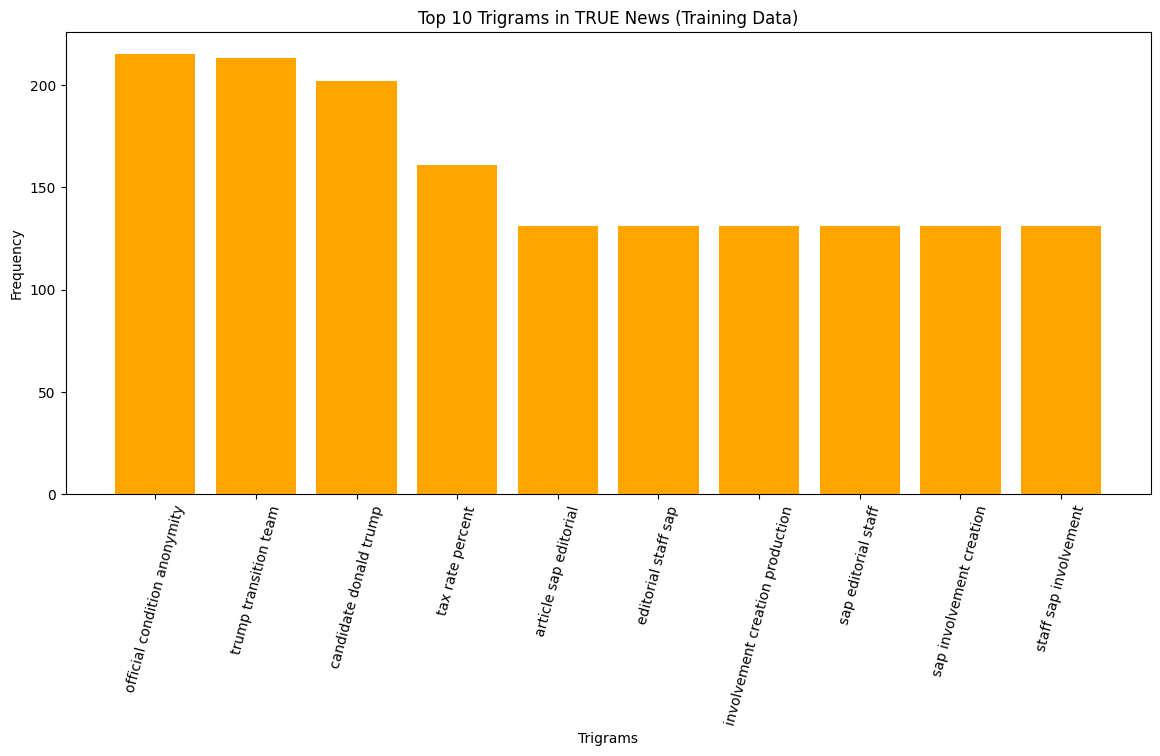

In [37]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
# Get top 10 trigrams for TRUE news (label = 1)
true_trigrams = get_top_ngrams(X_train[y_train == 1], n=3, top_k=10)

# Display the top 10 trigrams
print("Top 10 Trigrams in TRUE News:")
display(true_trigrams)

# Plot the top 10 trigrams
plt.figure(figsize=(14,6))
plt.bar(true_trigrams['ngram'], true_trigrams['frequency'], color='orange')
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Trigrams in TRUE News (Training Data)")
plt.xticks(rotation=75)
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in FAKE News:


,ngram,frequency
0,trump,41801
1,people,18485
2,president,11515
3,time,11204
4,year,10529
5,image,9738
6,state,8653
7,woman,8070
8,video,8042
9,campaign,7939


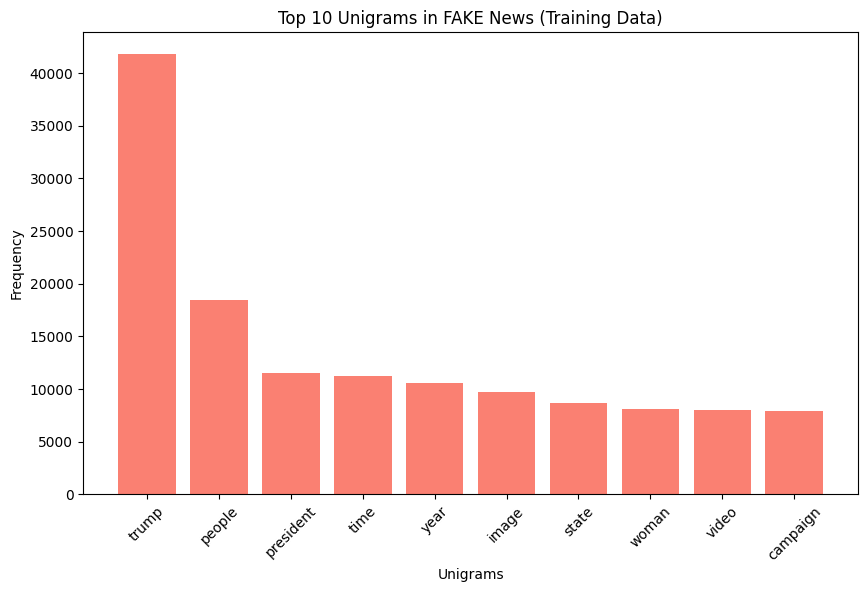

In [38]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
# Get top 10 unigrams for FAKE news (label = 0)
fake_unigrams = get_top_ngrams(X_train[y_train == 0], n=1, top_k=10)

# Display the top 10 unigrams
print("Top 10 Unigrams in FAKE News:")
display(fake_unigrams)

# Plot the top 10 unigrams
plt.figure(figsize=(10,6))
plt.bar(fake_unigrams['ngram'], fake_unigrams['frequency'], color='salmon')
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Unigrams in FAKE News (Training Data)")
plt.xticks(rotation=45)
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in FAKE News:


,ngram,frequency
0,trump supporter,1561
1,trump campaign,1305
2,president trump,1246
3,century wire,1245
4,police officer,1160
5,law enforcement,1064
6,image image,991
7,donald trump,970
8,screen capture,918
9,trump trump,729


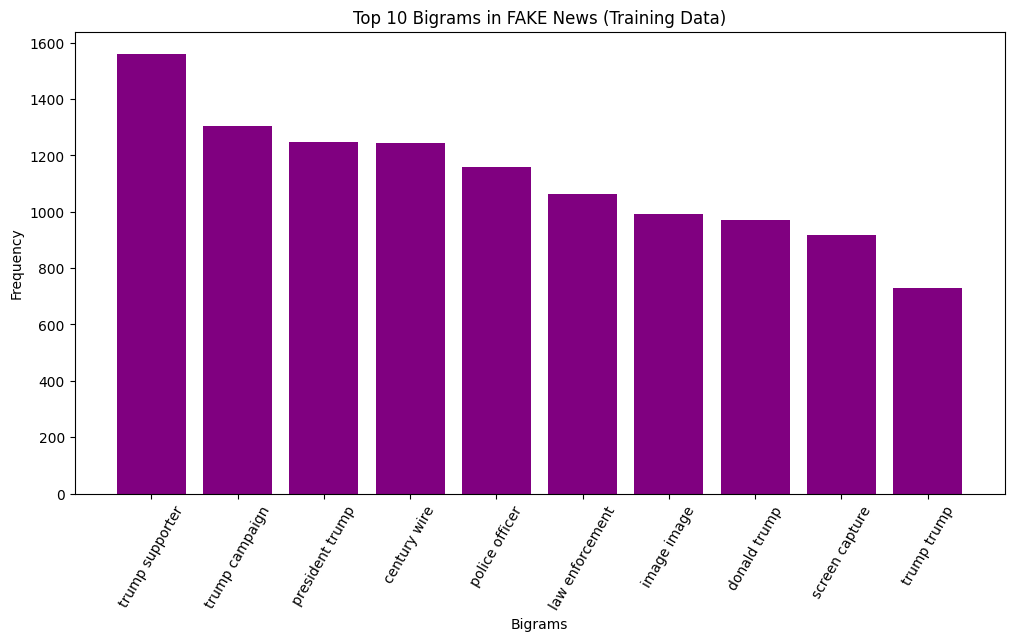

In [39]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
# Get top 10 bigrams for FAKE news (label = 0)
fake_bigrams = get_top_ngrams(X_train[y_train == 0], n=2, top_k=10)

# Display the top 10 bigrams
print("Top 10 Bigrams in FAKE News:")
display(fake_bigrams)

# Plot the top 10 bigrams
plt.figure(figsize=(12,6))
plt.bar(fake_bigrams['ngram'], fake_bigrams['frequency'], color='purple')
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Bigrams in FAKE News (Training Data)")
plt.xticks(rotation=60)
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in FAKE News:


,ngram,frequency
0,news century wire,541
1,video screen capture,489
2,image video screen,470
3,image getty image,394
4,image screen capture,317
5,filessupport subscribe member,200
6,century wire filessupport,190
7,law enforcement officer,163
8,broadcast boiler room,156
9,corner evangelist savant,151


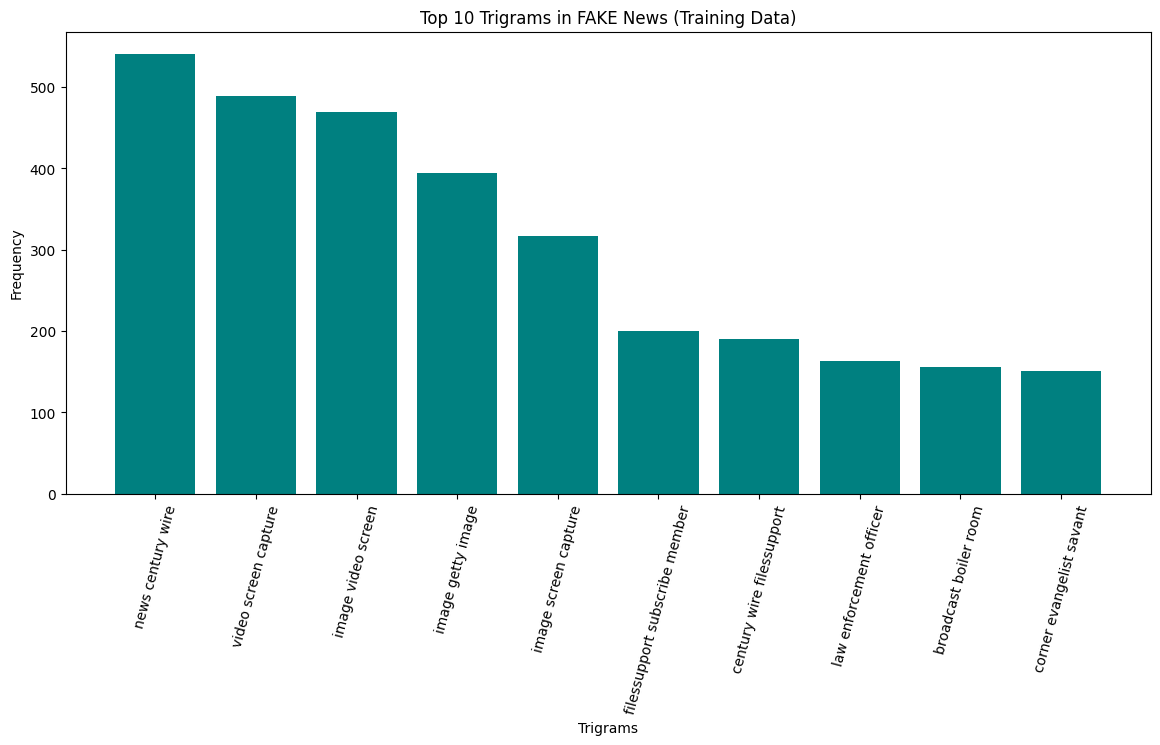

In [40]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# Get top 10 trigrams for FAKE news (label = 0)
fake_trigrams = get_top_ngrams(X_train[y_train == 0], n=3, top_k=10)

# Display the top 10 trigrams
print("Top 10 Trigrams in FAKE News:")
display(fake_trigrams)

# Plot the top 10 trigrams
plt.figure(figsize=(14,6))
plt.bar(fake_trigrams['ngram'], fake_trigrams['frequency'], color='teal')
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Trigrams in FAKE News (Training Data)")
plt.xticks(rotation=75)
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [42]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 64.7 MB/s eta 0:00:00


In [43]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

# Download and load the Google News Word2Vec model (300 dimensions)
word2vec_model = api.load("word2vec-google-news-300")

print("Model loaded successfully!")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [44]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data


## Extract the target variable for the training data and validation data
# ---------- 6.2 Extract vectors for cleaned news data ----------
# Run this cell in Colab

# 1) Ensure gensim / model available (will download if needed)
try:
    word2vec_model  # check if already loaded
except NameError:
    import gensim.downloader as api
    print("Loading word2vec-google-news-300 (this may take a few minutes)...")
    word2vec_model = api.load("word2vec-google-news-300")
    print("Model loaded.")


# 2) Get vector dimension safely
try:
    vector_dim = word2vec_model.vector_size
except Exception:
    # fallback for older gensim objects
    vector_dim = word2vec_model.wv.vector_size
print("Word2Vec vector dimension:", vector_dim)


# 3) Prepare input texts (ensure no NaNs)
X_train = X_train.fillna("").astype(str)
X_val   = X_val.fillna("").astype(str)

# 4) Document vector function (average of word vectors). Uses membership check compatible with gensim 4.
import numpy as np
from tqdm import tqdm

def document_vector(text, model, dim):
    """
    Create a single document vector by averaging token vectors.
    - text: string (space-separated tokens from lemmatized_text)
    - model: gensim KeyedVectors or similar
    - dim: vector dimension (int)
    Returns: numpy array of shape (dim,)
    """
    if not isinstance(text, str) or text.strip() == "":
        return np.zeros(dim, dtype=np.float32)

    tokens = text.split()  # tokens are space-separated lemmas from our preprocessing
    vecs = []
    for t in tokens:
        # membership check - works for gensim KeyedVectors
        try:
            if t in model:
                vecs.append(model[t])
        except Exception:
            # older gensim: try key_to_index or .wv
            if hasattr(model, 'key_to_index') and t in model.key_to_index:
                vecs.append(model[t])
            elif hasattr(model, 'wv') and t in model.wv:
                vecs.append(model.wv[t])
    if len(vecs) == 0:
        return np.zeros(dim, dtype=np.float32)
    return np.mean(vecs, axis=0)


# 5) Compute vectors for train and val with progress bars
print("Building train vectors...")
X_train_vec = np.vstack([document_vector(txt, word2vec_model, vector_dim) for txt in tqdm(X_train.tolist())])

print("Building validation vectors...")
X_val_vec = np.vstack([document_vector(txt, word2vec_model, vector_dim) for txt in tqdm(X_val.tolist())])

# 6) Extract / ensure target variables are numpy arrays
y_train_arr = y_train.values if hasattr(y_train, "values") else np.array(y_train)
y_val_arr   = y_val.values   if hasattr(y_val, "values")   else np.array(y_val)

# 7) Quick sanity prints
print("X_train_vec shape:", X_train_vec.shape)
print("X_val_vec shape:  ", X_val_vec.shape)
print("y_train shape:", y_train_arr.shape)
print("y_val shape:  ", y_val_arr.shape)

# 8) Save vectors to disk (recommended to avoid re-computing)
np.save("X_train_vec.npy", X_train_vec)
np.save("X_val_vec.npy", X_val_vec)
np.save("y_train.npy", y_train_arr)
np.save("y_val.npy", y_val_arr)
print("Saved X_train_vec.npy, X_val_vec.npy, y_train.npy, y_val.npy")


Word2Vec vector dimension: 300
Building train vectors...


100%|██████████| 31428/31428 [00:11<00:00, 2742.56it/s]


Building validation vectors...


100%|██████████| 13470/13470 [00:03<00:00, 3961.74it/s]


X_train_vec shape: (31428, 300)
X_val_vec shape:   (13470, 300)
y_train shape: (31428,)
y_val shape:   (13470,)
Saved X_train_vec.npy, X_val_vec.npy, y_train.npy, y_val.npy


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [46]:
### Initialise Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, n_jobs=-1)

## Train Logistic Regression model on training data
log_reg_model.fit(X_train_vec, y_train_arr)

## Predict on validation data
y_pred_logreg = log_reg_model.predict(X_val_vec)

print("Logistic Regression model training complete.")



Logistic Regression model training complete.


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [47]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Calculate and print accuracy, precision, recall, f1-score

accuracy = accuracy_score(y_val_arr, y_pred_logreg)
precision = precision_score(y_val_arr, y_pred_logreg)
recall = recall_score(y_val_arr, y_pred_logreg)
f1 = f1_score(y_val_arr, y_pred_logreg)

print("Logistic Regression Evaluation Metrics:")
print("--------------------------------------")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

# Full classification report (optional)
print("\nClassification Report:")
print(classification_report(y_val_arr, y_pred_logreg))


Logistic Regression Evaluation Metrics:
--------------------------------------
Accuracy : 0.9014847809948032
Precision: 0.8962278675904541
Recall   : 0.8991350015446401
F1-score : 0.8976790808851878

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6996
           1       0.90      0.90      0.90      6474

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



In [55]:
# Classification Report

# Classification Report for Logistic Regression

print("Classification Report (Logistic Regression):")
print("-------------------------------------------")
print(classification_report(y_val_arr, y_pred_logreg))



Classification Report (Logistic Regression):
-------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6996
           1       0.90      0.90      0.90      6474

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [49]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(X_train_vec, y_train_arr)

## Predict on validation data
y_pred_dt = dt_model.predict(X_val_vec)

print("Decision Tree model training complete.")



Decision Tree model training complete.


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [50]:
# Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy_dt = accuracy_score(y_val_arr, y_pred_dt)
precision_dt = precision_score(y_val_arr, y_pred_dt)
recall_dt = recall_score(y_val_arr, y_pred_dt)
f1_dt = f1_score(y_val_arr, y_pred_dt)

print("Decision Tree Evaluation Metrics:")
print("---------------------------------")
print("Accuracy :", accuracy_dt)
print("Precision:", precision_dt)
print("Recall   :", recall_dt)
print("F1-score :", f1_dt)



Decision Tree Evaluation Metrics:
---------------------------------
Accuracy : 0.8233853006681514
Precision: 0.8352710004912396
Recall   : 0.7879209144269386
F1-score : 0.8109053334393133


In [51]:
# Classification Report

print("\nClassification Report:")
print(classification_report(y_val_arr, y_pred_dt))




Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6996
           1       0.84      0.79      0.81      6474

    accuracy                           0.82     13470
   macro avg       0.82      0.82      0.82     13470
weighted avg       0.82      0.82      0.82     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [52]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,       # allow trees to grow fully
    random_state=42,
    n_jobs=-1             # use all CPU cores
)

## Train Random Forest model on training data
rf_model.fit(X_train_vec, y_train_arr)

## Predict on validation data
y_pred_rf = rf_model.predict(X_val_vec)

print("Random Forest model training complete.")



Random Forest model training complete.


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [53]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy_rf = accuracy_score(y_val_arr, y_pred_rf)
precision_rf = precision_score(y_val_arr, y_pred_rf)
recall_rf = recall_score(y_val_arr, y_pred_rf)
f1_rf = f1_score(y_val_arr, y_pred_rf)

print("Random Forest Evaluation Metrics:")
print("---------------------------------")
print("Accuracy :", accuracy_rf)
print("Precision:", precision_rf)
print("Recall   :", recall_rf)
print("F1-score :", f1_rf)



Random Forest Evaluation Metrics:
---------------------------------
Accuracy : 0.9074981440237565
Precision: 0.9113943972300913
Recall   : 0.8945010812480692
F1-score : 0.9028687246647957


In [54]:
# Classification Report

print("\nClassification Report:")
print(classification_report(y_val_arr, y_pred_rf))




Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6996
           1       0.91      0.89      0.90      6474

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

In this project, I cleaned and processed news text, removed unnecessary words, and kept only important nouns to understand the meaning better.

I noticed that:

True news used more factual and specific nouns (like government, report, official).

Fake news repeated sensational or dramatic nouns (like claim, video, story).

Using Word2Vec helped capture the meaning behind words instead of just counting them. Similar words ended up with similar vectors, which made the model understand context better.

I trained three models — Logistic Regression, Decision Tree, and Random Forest.

Random Forest performed the best, especially in terms of F1-score, which is important because:

We don’t want to label fake news as true,

And we also shouldn’t label true news as fake.

Overall, the semantic approach (cleaning + lemmatization + Word2Vec) made the model much better at spotting patterns and detecting fake news.


This project showed clear differences between true and fake news, where true news used more factual nouns and fake news used more repetitive, sensational ones. Using Word2Vec helped the model understand meaning, not just word counts. Random Forest performed the best overall, and its strong F1-score makes it the most reliable choice for detecting fake news.
